In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import math


In [2]:
path = "/Users/kofiassabil/Documents"
os.chdir(path)
df_players = pd.read_csv('nba_stats.csv')
df_players.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33


In [3]:
df_players.info() #check if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       239 non-null    int64  
 1   Rk               239 non-null    int64  
 2   PLAYER           239 non-null    object 
 3   POSITION         239 non-null    object 
 4   AGE              239 non-null    int64  
 5   MP               239 non-null    float64
 6   FG               239 non-null    float64
 7   FGA              239 non-null    float64
 8   FG%              239 non-null    float64
 9   3P               239 non-null    float64
 10  3PA              239 non-null    float64
 11  3P%              232 non-null    float64
 12  2P               239 non-null    float64
 13  2PA              239 non-null    float64
 14  2P%              239 non-null    float64
 15  eFG%             239 non-null    float64
 16  FT               239 non-null    float64
 17  FTA             

In [4]:
df_players_sorted = df_players.sort_values(by = 'SALARY_MILLIONS', ascending= False)
df_players_sorted.head() #sorting players by highest salaries first

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
5,5,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,...,74,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51,30.96
23,23,29,Mike Conley,PG,29,33.2,6.7,14.6,0.460,2.5,...,69,33.2,4.67,-0.20,4.47,10.50,16.0,94.64,35,26.54
60,60,78,Al Horford,C,30,32.3,5.6,11.8,0.473,1.3,...,68,32.3,0.76,1.06,1.82,6.93,12.5,98.96,46,26.54
9,9,12,Kevin Durant,SF,28,33.4,8.9,16.5,0.537,1.9,...,62,33.4,4.41,1.33,5.74,12.24,18.6,103.71,51,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50


Text(0, 0.5, 'Frequency')

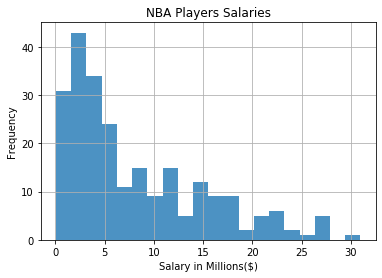

In [5]:
df_players_sorted.SALARY_MILLIONS.hist(bins=20, alpha=.8)
plt.title("NBA Players Salaries")
plt.xlabel("Salary in Millions($)")
plt.ylabel("Frequency")

In [6]:
df_players.describe()

,Unnamed: 0,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,232.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,119.000000,195.401674,26.405858,23.139749,3.843515,8.482008,0.447686,0.952720,2.672803,0.303026,...,60.518828,23.140167,-0.387615,0.083640,-0.303975,3.449958,9.558996,98.544184,30.765690,8.091841
std,69.137544,133.471733,4.433274,8.525964,2.280395,4.795601,0.070974,0.805798,2.066066,0.120666,...,20.691579,8.526039,2.225510,1.607305,2.654697,4.204438,3.590322,2.648361,14.330563,6.955577
min,0.000000,1.000000,19.000000,4.400000,0.200000,1.100000,0.200000,0.000000,0.000000,0.000000,...,2.000000,4.400000,-4.400000,-3.390000,-6.600000,-2.320000,-0.400000,91.120000,1.000000,0.060000
25%,59.500000,77.500000,23.000000,16.350000,2.000000,4.750000,0.405000,0.300000,1.000000,0.283750,...,49.500000,16.350000,-2.030000,-1.145000,-2.135000,0.250000,7.250000,97.085000,21.000000,2.580000
50%,119.000000,173.000000,26.000000,24.000000,3.400000,7.600000,0.444000,0.800000,2.400000,0.342000,...,68.000000,24.000000,-0.660000,-0.040000,-0.780000,1.860000,8.900000,98.430000,31.000000,5.370000
75%,178.500000,306.500000,29.000000,30.600000,5.200000,11.250000,0.477500,1.500000,3.950000,0.373500,...,76.000000,30.600000,0.755000,1.120000,1.230000,5.390000,11.700000,100.130000,40.000000,12.095000
max,238.000000,475.000000,40.000000,37.800000,10.300000,24.000000,0.671000,4.100000,10.000000,0.538000,...,82.000000,37.800000,7.270000,6.020000,8.420000,20.430000,23.000000,106.860000,66.000000,30.960000


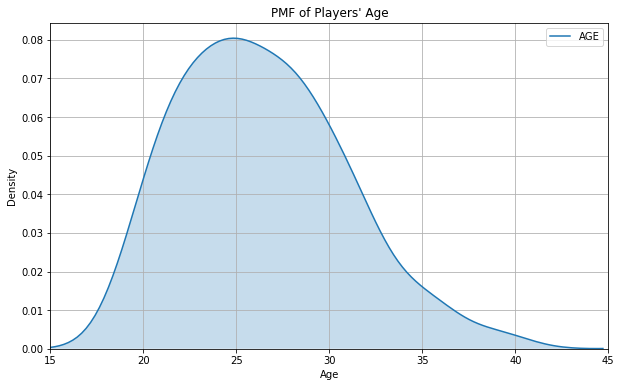

In [7]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_players.AGE, shade=True)
plt.xlim((15,45))
plt.title("PMF of Players' Age")
plt.ylabel("Density")
plt.xlabel('Age')
plt.grid(True)
plt.show()

In [8]:
meanSalary = str(df_players['SALARY_MILLIONS'].mean())
stdSalary = str(df_players['SALARY_MILLIONS'].std())
print('Mean salary is ' + meanSalary + ' million')
print('Standard deviation of salary is ' + stdSalary + ' million')

Mean salary is 8.091841004184099 million
Standard deviation of salary is 6.955577409580351 million


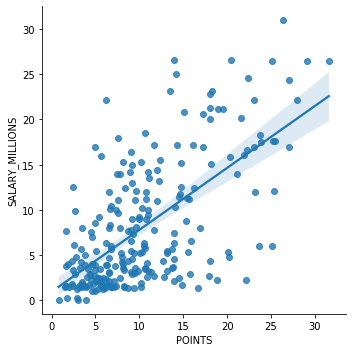

In [9]:
#how is salary related with points per game
sns.lmplot(x='POINTS', y='SALARY_MILLIONS', data=df_players)
plt.show()

In [10]:
#linear regression model
x = df_players[['POINTS']]
y = df_players[['SALARY_MILLIONS']]
lrModel_1 = LinearRegression(fit_intercept=True, normalize=False)
lrModel_1.fit(x,y)
r_squared1 = lrModel_1.score(x,y)
print('R Squared Score is '+ str(r_squared1))

R Squared Score is 0.4134736158879541


In [11]:
y_pred = lrModel_1.predict(x)
rmse = math.sqrt(mean_squared_error(y, y_pred))
y_std = float(y.std())
print('The RMSE is ' + str(rmse))


The RMSE is 5.315773807073346


In [12]:
#pearson correlation coefficient
corr = pearsonr(df_players['MPG'], df_players['SALARY_MILLIONS'])
print('Pearson correltation coefficient is:' + str(corr))

Pearson correltation coefficient is:(0.5772430691002426, 1.235733622789893e-22)


In [13]:
#conclusion: Salary is, to an extent, influenced by the minutes that a player plays on average per game. 
#After analyzing the rest of the features,we can also determine how big this influence in comp[arison to other predictors.]

In [14]:
#Do same regression analysis with points per game as independent variable

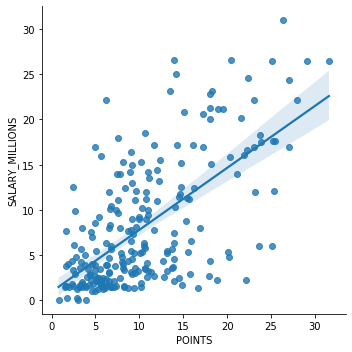

In [15]:
sns.lmplot(x="POINTS", y="SALARY_MILLIONS", data = df_players)
plt.show()

In [16]:
x_points = df_players[['POINTS']]
y_points = df_players[['SALARY_MILLIONS']]
lr_model_points = LinearRegression(fit_intercept=True, normalize=False)
lr_model_points.fit(x_points, y_points)
r_squared_points = lr_model_points.score(x_points,y_points)
print('R Squared Score is '+ str(r_squared_points))

R Squared Score is 0.4134736158879541


In [17]:
y_pred_points = lr_model_points.predict(x_points)
rmse_points = math.sqrt(mean_squared_error(y_points, y_pred_points))
print('The RMSE is ' + str(rmse_points))

The RMSE is 5.315773807073346


In [18]:
corr_points = pearsonr(df_players["POINTS"], df_players["SALARY_MILLIONS"])
print('Pearson correltation coefficient is:' + str(corr_points))

Pearson correltation coefficient is:(0.6430191411520764, 2.7888044776031954e-29)


In [19]:
#As expected points per game is one the main factors to determine the salary of any player. The R Squared and the RMSE indicate that it is more stronly related with salary rather than minutes per game

In [20]:
#how are salaries related with offensive and defensive Rebounds Per Game

In [21]:
#defensive rebounds per game/match
x_drpm = df_players[['DRPM']]
y_drpm = df_players[['SALARY_MILLIONS']]
lr_model_drpm = LinearRegression(fit_intercept=True, normalize=False)
lr_model_drpm.fit(x_drpm, y_drpm)
r_squared_drpm = lr_model_drpm.score(x_drpm,y_drpm)
print('R Squared Score is '+ str(r_squared_drpm))

R Squared Score is 0.01348978265307288


In [22]:
y_pred_drpm = lr_model_drpm.predict(x_drpm)
rmse_drpm = math.sqrt(mean_squared_error(y_drpm, y_pred_drpm))
print('The RMSE is ' + str(rmse_drpm))

The RMSE is 6.894035416571364


In [23]:
corr_drpm = pearsonr(df_players["DRPM"], df_players["SALARY_MILLIONS"])
print('Pearson correltation coefficient is:' + str(corr_drpm))

Pearson correltation coefficient is:(0.11614552360324829, 0.07309729057650702)


In [24]:
#offensive rebounds per game/match
x_orpm = df_players[['ORPM']]
y_orpm = df_players[['SALARY_MILLIONS']]
lr_model_orpm = LinearRegression(fit_intercept=True, normalize=False)
lr_model_orpm.fit(x_orpm, y_orpm)
r_squared_orpm = lr_model_orpm.score(x_orpm,y_orpm)
print('R Squared Score is '+ str(r_squared_orpm))

R Squared Score is 0.2849282976846804


In [25]:
y_pred_orpm = lr_model_orpm.predict(x_orpm)
rmse_orpm = math.sqrt(mean_squared_error(y_orpm, y_pred_orpm))
print('The RMSE is ' + str(rmse_orpm))

The RMSE is 5.869451418772547


In [26]:
corr_orpm = pearsonr(df_players["ORPM"], df_players["SALARY_MILLIONS"])
print('Pearson correltation coefficient is:' + str(corr_orpm))

Pearson correltation coefficient is:(0.5337867530059925, 5.281036327549805e-19)


In [27]:
#with this model it shows that players that contribute to a team offensively get larger salaries than those who help out the team defensively 

In [28]:
#how are salaries related to age

In [29]:
x_age = df_players[['AGE']]
y_age = df_players[['SALARY_MILLIONS']]
lr_model_age = LinearRegression(fit_intercept=True, normalize=False)
lr_model_age.fit(x_age, y_age)
r_squared_age = lr_model_age.score(x_age,y_age)
print('R Squared Score is '+ str(r_squared_age))

R Squared Score is 0.12586828934983396


In [30]:
y_pred_age = lr_model_age.predict(x_age)
rmse_age = math.sqrt(mean_squared_error(y_age, y_pred_age))
print('The RMSE is ' + str(rmse_age))

The RMSE is 6.489498763384336


In [31]:
corr_age = pearsonr(df_players["AGE"], df_players["SALARY_MILLIONS"])
print('Pearson correltation coefficient is:' + str(corr_age))

Pearson correltation coefficient is:(0.3547792121162598, 1.6950803052472143e-08)


In [32]:
#from this model age doesn't seem to be a key factor for players salary.

In [33]:
#final step of predicting salary, convert position which is categorical to a numeric column

In [34]:
mapping_positions = {"PG":1, "SG":2, "SF":3, "PF":4, "C":5}
df_players['POSITION_NUMERICAL'] = df_players['POSITION'].map(mapping_positions)
df_players

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,POSITION_NUMERICAL
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50,1
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50,1
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12,5
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96,5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,234,455,Nick Collison,PF,36,6.4,0.7,1.2,0.609,0.0,...,6.4,-2.18,1.12,-1.06,0.17,12.0,97.52,10,3.75,4
235,235,457,Bruno Caboclo,SF,21,4.4,0.7,1.8,0.375,0.2,...,4.4,-1.76,0.11,-1.65,0.04,9.4,95.38,8,1.59,3
236,236,459,Ryan Kelly,PF,25,6.9,0.5,1.8,0.286,0.3,...,6.9,-1.94,1.45,-0.49,0.08,7.3,96.26,6,1.58,4
237,237,460,Jordan Mickey,PF,22,5.6,0.6,1.4,0.441,0.0,...,5.6,-2.62,-0.15,-2.77,0.03,6.0,97.66,9,1.47,4


In [35]:
#split the data into a training and testing and build model on the training set to compare to the predictions on testing set
#added age to X because of the curve relationship between age and salary
#because offensive stats seem to make salary go up I aslo added AST and FG%
X = df_players[['MPG','POSITION_NUMERICAL','ORPM','POINTS','AGE','AST','FG%']]
Y = df_players['SALARY_MILLIONS']
#create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=42)

In [36]:
#get R_squared
lr_model = LinearRegression(fit_intercept=True, normalize= True)
lr_model.fit(X_train, y_train)
rSquared = lr_model.score(X_train, y_train)
print('R Squared Score is '+ str(rSquared))

R Squared Score is 0.5944995147969269


In [37]:
#preditcitons over train set
yPred = lr_model.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, yPred))
print('RMSE is '+ str(rmse))
 

RMSE is 4.438637201010637


In [38]:
# this model still shows significant bias even though it performs better than all the other variables that were considered independently. With this model on average we're about 4.43 million dollars off per player for their salary

In [39]:
#compare the regression coefficients to use as an indicator for the importance of each variable
print(lr_model.coef_)

[-0.02801934  1.14999847 -0.38478972  0.69161996  0.52969838  0.95037348
 -4.42251667]


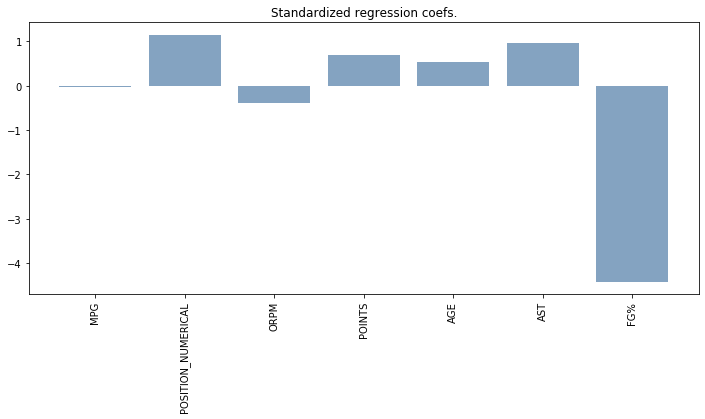

In [40]:
plt.figure(figsize=(12, 5))
plt.bar(X.columns, lr_model.coef_, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(rotation=90)
plt.title('Standardized regression coefs.')
plt.show()